In [1]:
from mflex.load.read_file import read_issi_analytical
import numpy as np
from mflex.plot.plot_magnetogram import (
    plot_fieldlines_issi_analytical,
    plot_fieldlines_grid,
)
from mflex.model.field.bfield_model import magnetic_field
import scipy
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import (
    deltapres,
    deltaden,
    btemp_linear,
    bpressure_linear,
    bdensity_linear,
    plasma_parameters_linear_test,
)
from mflex.evaluate.metrics import (
    vec_corr_metric,
    vec_corr_metric2,
    cau_Schw_metric,
    cau_Schw_metric2,
    norm_vec_err_metric,
    norm_vec_err_metric2,
    mean_vec_err_metric,
    mean_vec_err_metric2,
    mag_ener_metric,
    mag_ener_metric2,
    field_div_metric,
    pearson_corr_coeff,
)
from mflex.model.field.utility.height_profile import f_low, f
from mflex.model.field.save import save_field
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

--------------------------------------------------
Date: Tue Sep  6 15:16:46 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 33 records of which:
 - 29 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 1 are of type NOTICE
--------------------------------------------------
Available variables:
 - b2dx1 [<class 'numpy.ndarray'>]
 - b2dy1 [<class 'numpy.ndarray'>]
 - b2dz1 [<class 'numpy.ndarray'>]
 - d2d1 [<class 'numpy.ndarray'>]
 - b2dx2 [<class 'numpy.ndarray'>]
 - b2dy2 [<class 'numpy.ndarray'>]
 - b2dz2 [<class 'numpy.ndarray'>]
 - d2d2 [<class 'numpy.ndarray'>]
 - b2dx3 [<class 'numpy.ndarray'>]
 - b2dy3 [<class 'numpy.ndarray'>]
 - b2dz3 [<class 'numpy.ndarray'>]
 - d2d3 [<class 'numpy.ndarray'>]
 - b2dx4 [<class 'numpy.ndarray'>]
 - b2dy4 [<class 'numpy.ndarray'>]
 - b2dz4 [<class '

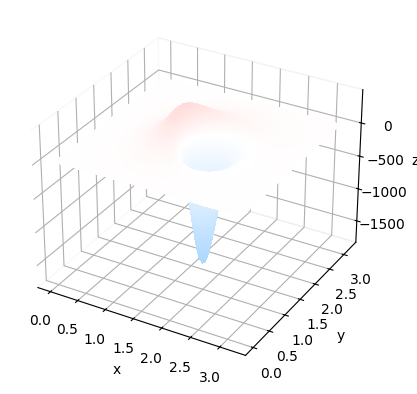

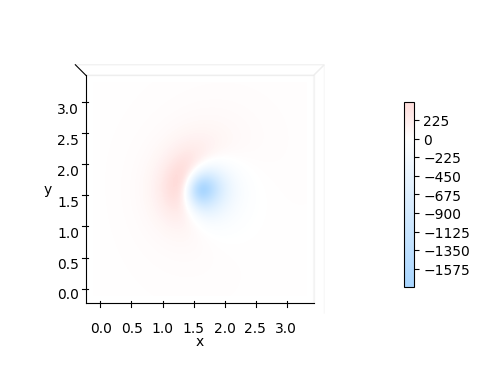

Bz z=0 Maximum 446.3689
Bz z=0 Minimum -1792.2522


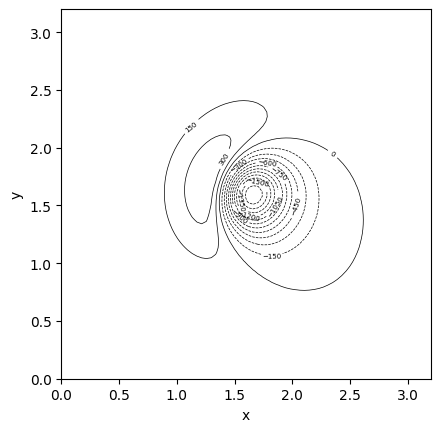

In [10]:
# data = read_issi_analytical("data/Analytic_boundary_data.sav")
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["dimgray", "whitesmoke"]
)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', (
    # Edit this gradient at https://eltos.github.io/gradient/#cmap=A9D6FF-FFFFFF-FF736B
    (0.000, (0.663, 0.839, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (1.000, (1.000, 0.451, 0.420))))

L = 1.0
data = read_issi_analytical(
    "/Users/lilli/Desktop/mflex/data/Analytic_boundary_data.sav", L
)
# BFieldvec_Seehafer = np.load('field_data_potential.npy')

data_bx = data.data_x
data_by = data.data_y
data_bz = data.data_z
nresol_x = data.nresol_x
nresol_y = data.nresol_y
nresol_z = data.nresol_z
pixelsize_x = data.pixelsize_x
pixelsize_y = data.pixelsize_y
pixelsize_z = data.pixelsize_z
nf_max = data.nf_max
xmin = data.xmin
xmax = data.xmax
ymin = data.ymin
ymax = data.ymax
zmin = data.zmin
zmax = data.zmax
z0 = data.z0

deltaz = z0 / 10.0  # z0 at 2Mm so widht of transition region = 200km

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
cs = ax.contourf(
    x_grid,
    y_grid,
    data_bz,
    1000,
    # offset=0.0,
    norm=matplotlib.colors.CenteredNorm(),
    cmap=cmap,
)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL1"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
cs = ax.contourf(
    x_grid,
    y_grid,
    data_bz,
    1000,
    # offset=0.0,
    norm=matplotlib.colors.CenteredNorm(),
    cmap=cmap,
)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(90, -90)
ax.set_zticks([])
ax.grid(False)
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(cs, shrink=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL2"
plt.savefig(plotname, dpi=300)
plt.show()

print("Bz z=0 Maximum", data_bz.max())
print("Bz z=0 Minimum", data_bz.min())

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid,
    y_grid,
    data_bz,
    18,
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=5, inline=True)
ax.set_box_aspect(1)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_BL3"
plt.savefig(plotname, dpi=300)
plt.show()

In [3]:
t_photosphere = 6000.0
t_corona = 10000.0  # 1.0 * 10.0**6
t_z0 = 10000.0
t0 = (t_photosphere + t_corona * np.tanh(z0 / deltaz)) / (1.0 + np.tanh(z0 / deltaz))
t1 = (t_corona - t_photosphere) / (1.0 + np.tanh(z0 / deltaz))
t0 = t_z0
t1 = t0 - t_photosphere

g_solar = 272.2  # kg/m^3
kB = 1.380649 * 10**-23  # Boltzmann constant in Joule/ Kelvin = kg m^2/(Ks^2)
mbar = 1.67262 * 10**-27  # mean molecular weight (proton mass)
h = (
    kB * t0 / (mbar * g_solar) * 10**-6 / L  # h' = h / L
)  # pressure scale height in normalised length scale (10**-6 to convert to Mm, and L**-1 to convert to normalised length scale)
rho0 = 2.7 * 10**-4  # plasma density at z = 0 in kg/(m^3)
b0 = 1792.2522  # Gauss background magnetic field strength in 10^-4 kg/(s^2A) = 10^-4 T
p0 = t_photosphere * kB * rho0 / mbar  # plasma pressure in kg/(s^2 m)
mu0 = 1.25663706 * 10**-6  # permeability of free space in mkg/(s^2A^2)
pB0 = (b0 * 10**-4) ** 2 / (2 * mu0)  # magnetic pressure b0**2 / 2mu0 in kg/(s^2m)
beta0 = p0 / pB0  # Plasma Beta, ration plasma to magnetic pressure
h_photo = h / t0 * t_photosphere
print(b0, pB0, p0, beta0)

druck = kB / mbar * 6000.0 * rho0
print("druck", druck)

1792.2522 12780.810190353768 13372.142985256665 1.0462672386253886
druck 13372.142985256663


alpha -0.3


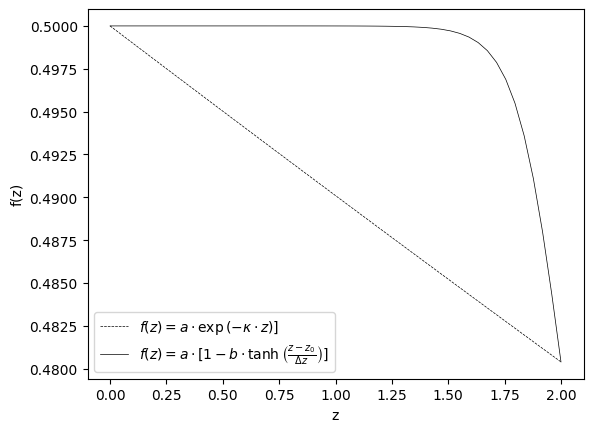

In [4]:
z_arr: np.ndarray[np.float64, np.dtype[np.float64]] = (
    np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
)

L_issi = nresol_x - 1.0

z0_b = z0
deltaz_b = deltaz
f_exp = np.zeros(nresol_z)
f_tanh = np.zeros(nresol_z)
a = 0.5 * np.exp(-0.02 * z0_b)
b = -(0.5 / a - 1.0) / np.tanh(-z0_b / deltaz_b)
alpha = -3.0 / L_issi * L
alpha = -0.3

print("alpha", alpha)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_exp[iz] = f_low(z, 0.5, 0.02)
    f_tanh[iz] = f(z, z0_b, deltaz_b, a, b)


plt.plot(
    z_arr,
    f_exp,
    label=r"$f(z) = a \cdot \exp\left(- \kappa \cdot z \right)]$",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    f_tanh,
    label=r"$f(z) = a \cdot [1 - b \cdot \tanh\left(\frac{z - z_0}{\Delta z}\right)]$",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("f(z)")
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/issi_heightprofiles.png"
plt.savefig(plotname, dpi=300)
plt.show()

length scale 2.0
length scale x 6.4
length scale y 6.4
length scale x norm 3.2
length scale y norm 3.2
xmin, xmax, ymin, ymax, zmin, zmax  0.0 3.2 0.0 3.2 0.0 2.0
(160, 160, 50, 3)
(160, 160)
(160, 160)


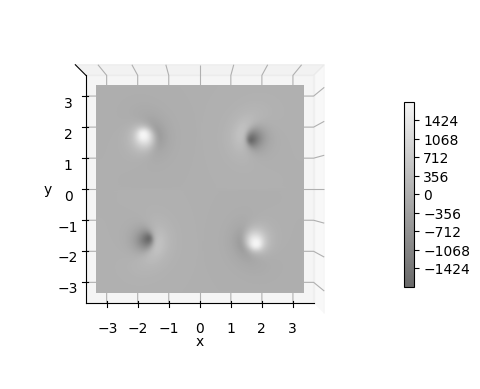

In [5]:
bfield, dpartial_bfield = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

save_field(
    bfield,
    dpartial_bfield,
    "issi_analytical_" + str(a) + "_" + str(alpha) + "_" + str(b),
)

x_arr = np.arange(2 * nresol_x) * (2 * xmax) / (2 * nresol_x - 1) - xmax
y_arr = np.arange(2 * nresol_y) * (2 * ymax) / (2 * nresol_y - 1) - ymax
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

print(bfield.shape)
print(x_grid.shape)
print(y_grid.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
cs = ax.contourf(
    x_grid,
    y_grid,
    bfield[:, :, 0, 2],
    1000,
    cmap=cmap,
)
# Have to have Xgrid first, Ygrid second, as Contourf expects x-axis/ columns first, then y-axis/rows
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("")
ax.set_zticks([])
ax.view_init(90, -90)
fig.colorbar(cs, shrink=0.5)
plt.show()

x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

In [6]:
path3d = "/Users/lilli/Desktop/mflex/data/Analytic_3D_data.sav"
data3d = scipy.io.readsav(path3d, python_dict=True, verbose=True)

print(data3d["info_unit"])
print(data3d["info_pixel"])
print(data3d["info_array"])

data_bx_ref = data3d["b3dx"]
data_by_ref = data3d["b3dy"]
data_bz_ref = data3d["b3dz"]

pres_3d = data3d["p3d"] * 10**-1
den_3d = data3d["d3d"] * 10**3

print("data_bx_ref.shape", data_bx_ref.shape)
print("data_by_ref.shape", data_by_ref.shape)
print("data_bz_ref.shape", data_bz_ref.shape)
print("pres_3d.shape", pres_3d.shape)
print("den_3d.shape", den_3d.shape)

bfield_bx = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 1]
bfield_by = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 0]
bfield_bz = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, :, 2]
print(bfield_bx.shape)
print(bfield_by.shape)
print(bfield_bz.shape)

issi_bx = 0.0 * bfield_bx
issi_by = 0.0 * bfield_by
issi_bz = 0.0 * bfield_bz

for i in range(0, nresol_y):
    for j in range(0, nresol_x):
        for k in range(0, nresol_z):
            issi_bx[i, j, k] = data_bx_ref[k, i, j]
            issi_by[i, j, k] = data_by_ref[k, i, j]
            issi_bz[i, j, k] = data_bz_ref[k, i, j]

"""plot_magnetogram_boundary(data_bz, nresol_x, nresol_y)
plot_magnetogram_boundary(bfield[nresol_y:2*nresol_y, nresol_x:2*nresol_x, 0, 2], nresol_x, nresol_y)
plot_magnetogram_boundary(issi_bz[:, :, 0], nresol_x, nresol_y)"""

x_arr = np.arange(2 * nresol_x) * (xmax - xmin) / (2 * nresol_x - 1) + xmin
y_arr = np.arange(2 * nresol_y) * (ymax - ymin) / (2 * nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid, y_grid = np.meshgrid(x_arr, y_arr)

--------------------------------------------------
Date: Tue Sep  6 15:11:11 2022
User: xszhu
Host: HR30
--------------------------------------------------
Format: 9
Architecture: x86_64
Operating System: linux
IDL Version: 7.1.1
--------------------------------------------------
Successfully read 12 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type NOTICE
 - 8 are of type VARIABLE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - b3dx [<class 'numpy.ndarray'>]
 - b3dy [<class 'numpy.ndarray'>]
 - b3dz [<class 'numpy.ndarray'>]
 - p3d [<class 'numpy.ndarray'>]
 - d3d [<class 'numpy.ndarray'>]
 - info_unit [<class 'bytes'>]
 - info_pixel [<class 'bytes'>]
 - info_array [<class 'bytes'>]
--------------------------------------------------
b'b3d, p3d, d3d: magnetic vector (Gauss), plasma pressure (dyn/cm^2), plasma density (g/cm^3)'
b'Pixel spacing: 40km*40km*40km'
b'Array example: d3d(nx,ny,nz)'
data_bx_ref.shape (50, 80, 80)
d

/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6475/224245885.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()
/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_6475/224245885.py:79: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical__0.4803947195761616_0.04081077436062276_-0.3_side.png


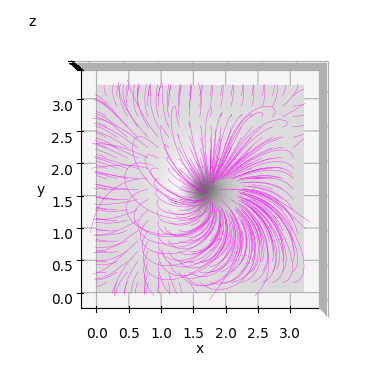

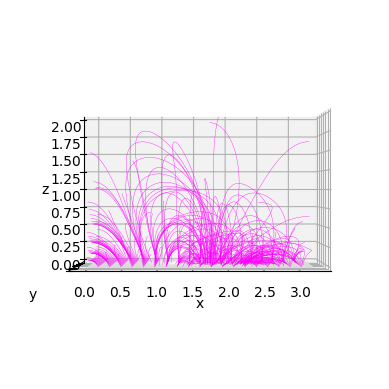

In [7]:
h1 = 0.01  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

plot = plot_fieldlines_issi_analytical(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.16,
    view="top",
    cmap=cmap,
)

plotname = (
    "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_"
    + "_"
    + str(a)
    + "_"
    + str(b)
    + "_"
    + str(alpha)
    + "_top.png"
)
ax.set_zticklabels([])  # type: ignore
plot.savefig(plotname, dpi=300)
plot.show()

plot = plot_fieldlines_issi_analytical(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.16,
    view="side",
    cmap=cmap,
)

plotname = (
    "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_"
    + "_"
    + str(a)
    + "_"
    + str(b)
    + "_"
    + str(alpha)
    + "_side.png"
)
ax.set_yticklabels([])  # type: ignore
plot.savefig(plotname, dpi=300)
plot.show()
print(
    "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_"
    + "_"
    + str(a)
    + "_"
    + str(b)
    + "_"
    + str(alpha)
    + "_side.png"
)

In [8]:
B_rec = np.array((bfield_by, bfield_bx, bfield_bz))
B_ref = np.array((issi_by, issi_bx, issi_bz))

print(B_rec.shape[1])

print("Vec Corr", vec_corr_metric(B_ref, B_rec))
print("Ref", vec_corr_metric(B_ref, B_ref))
print("Vec Corr2", vec_corr_metric2(B_ref, B_rec))
print("Ref", vec_corr_metric2(B_ref, B_ref))
print("Cau Schw", cau_Schw_metric(B_ref, B_rec))
print("Ref", cau_Schw_metric(B_ref, B_ref))
print("Cau Schw2", cau_Schw_metric2(B_ref, B_rec))
print("Ref", cau_Schw_metric2(B_ref, B_ref))
print("Norm err", norm_vec_err_metric(B_ref, B_rec))
print("Ref", norm_vec_err_metric(B_ref, B_ref))
print("Norm err2", norm_vec_err_metric2(B_ref, B_rec))
print("Ref", norm_vec_err_metric2(B_ref, B_ref))
print("Mean err", mean_vec_err_metric(B_ref, B_rec))
print("Ref", mean_vec_err_metric(B_ref, B_ref))
print("Mean err2", mean_vec_err_metric2(B_ref, B_rec))
print("Ref", mean_vec_err_metric2(B_ref, B_ref))
print("Mag ener", mag_ener_metric(B_ref, B_rec))
print("Ref", mag_ener_metric(B_ref, B_ref))
print("Mag ener2", mag_ener_metric2(B_ref, B_rec))
print("Ref", mag_ener_metric2(B_ref, B_ref))

80
Vec Corr 0.9894152171992967
Ref 1.0
Vec Corr2 0.9894152171993283
Ref 1.0
Cau Schw 0.67298125
Ref 1.0
Cau Schw2 0.7987972081415462
Ref 1.0
Norm err 0.2727212415948188
Ref 0.0
Norm err2 0.27562131888337754
Ref 0.0
Mean err 2.8798714864578603
Ref 0.0
Mean err2 0.5374741130083236
Ref 0.0
Mag ener 2.407321095151776
Ref 1.0
Mag ener2 1.07456965570861
Ref 1.0


NameError: name 'CS_arr' is not defined

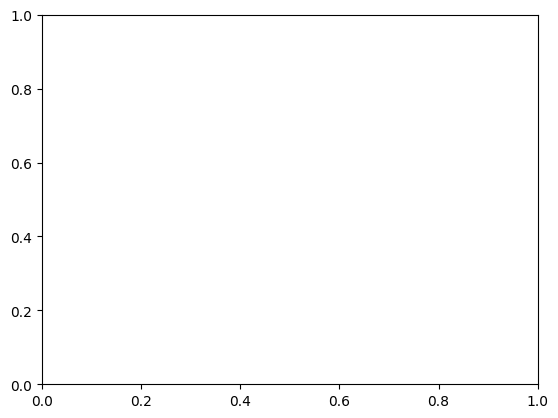

In [9]:
x_arr1 = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr1 = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
x_grid1, y_grid1 = np.meshgrid(x_arr1, y_arr1)

fig = plt.figure()
ax = fig.add_subplot(111)
CS = ax.contour(
    x_grid1,
    y_grid1,
    CS_arr[0, :, :, 10],
    1,
    colors="k",
    linewidths=0.5,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.clabel(CS, fontsize=5, inline=True)
ax.set_box_aspect(1)
plt.show()

In [ ]:
B_error_abs = abs(B_rec - B_ref)

B_error_rel = abs(B_rec - B_ref) / abs(B_ref)

print(B_error_abs.max())
print(B_error_rel.max())

86.24903862253882
90671.88770960872


In [ ]:
temps = np.array([6000.0, 5500.0, 10000.0])
heights = np.array([0.0, z0 / 4, z0])

# backpres = np.zeros_like(z_arr)
# backden = np.zeros_like(z_arr)

# dpres = np.zeros((nresol_y, nresol_x, nresol_z))
# dden = np.zeros((nresol_y, nresol_x, nresol_z))

# fpres_lin = np.zeros((nresol_y, nresol_x, nresol_z))
# fden_lin = np.zeros((nresol_y, nresol_x, nresol_z))

# for ix in range(nresol_x):
#     for iy in range(nresol_y):
#         for iz, z in enumerate(z_arr):
#             bz = bfield[nresol_y + iy, nresol_x + ix, iz, 2]
#             bdotgradbz = (
#                 bfield[nresol_y + iy, nresol_x + ix, iz, 2]
#                 * dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 2]
#                 + bfield[nresol_y + iy, nresol_x + ix, iz, 1]
#                 * dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 1]
#                 + bfield[nresol_y + iy, nresol_x + ix, iz, 0]
#                 * dpartial_bfield[nresol_y + iy, nresol_x + ix, iz, 0]
#             )

#             backpres[iz] = bpressure_linear(z, temps, heights, t0, h)
#             backden[iz] = bdensity_linear(z, temps, heights, t0, h, t_photosphere)

#             dpres[iy, ix, iz] = deltapres(z, z0_b, deltaz_b, a, b, bz)
#             dden[iy, ix, iz] = deltaden(z, z0_b, deltaz_b, a, b, bz, bdotgradbz)

#             fpres_lin[iy, ix, iz] = (
#                 b0**2.0 / mu0 * 0.5 * beta0 * backpres[iz] * 10**-8
#                 + dpres[iy, ix, iz] / mu0 * 10**-8
#             )
#             fden_lin[iy, ix, iz] = (
#                 0.5
#                 * beta0
#                 / h
#                 * t0
#                 / t_photosphere
#                 * b0**2.0
#                 / (mu0 * g_solar * L)
#                 * backden[iz]
#                 * 10**-14
#                 + dden[iy, ix, iz] / (mu0 * g_solar * L) * 10**-14
#             )

In [ ]:
(
    Backpres,
    Backden,
    dpres,
    dden,
    fpres_lin,
    fden_lin,
    backtemp,
) = plasma_parameters_linear_test(
    z_arr,
    temps,
    heights,
    t0,
    t_photosphere,
    h,
    bfield,
    dpartial_bfield,
    z0_b,
    deltaz_b,
    a,
    b,
    mu0,
    g_solar,
    b0,
    beta0,
    L,
)

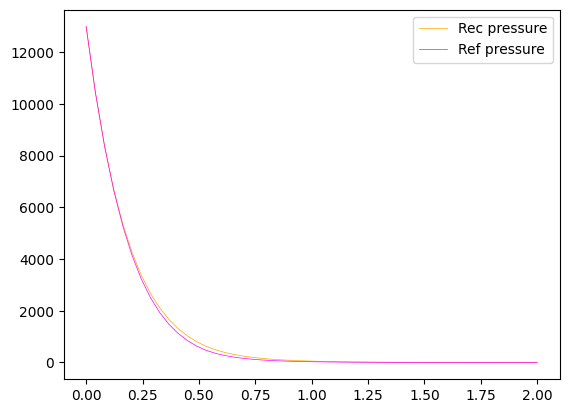

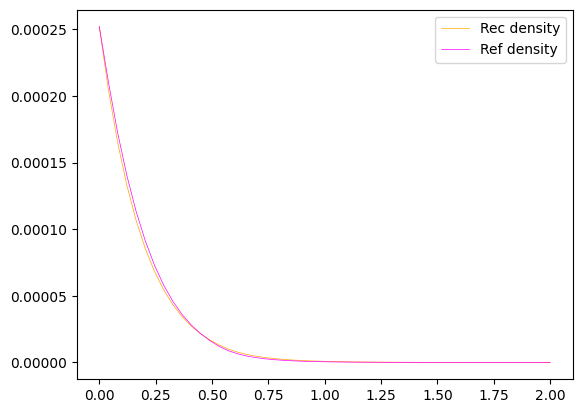

In [ ]:
b_back = np.zeros((2 * nresol_y, 2 * nresol_x))
b_back = bfield[:, :, 0, 2]

b_back_small = b_back[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x]
maxcoord = np.unravel_index(
    np.argmax(b_back_small, axis=None),
    b_back_small.shape,
)
iy = int(maxcoord[0])
ix = int(maxcoord[1])

"""plt.plot(z_arr, abs(dden), linewidth=0.5, color="black", linestyle="solid")
plt.plot(z_arr, abs(dpres), linewidth=0.5, color="blue", linestyle="solid")
# plt.axvline(x=z0, color="black", linestyle="solid", linewidth=0.25)
# plt.legend()
plt.xlabel("z")
plt.yscale("log")
# plt.ylim([10**-20, 0.0])
# plt.xlim([0.4, 0.6])
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure9b.png"
# plt.savefig(plotname, dpi=300)
plt.show()"""

# plt.plot(z_arr, fpres_lin, linewidth=0.5, color="blue")
plt.plot(
    z_arr,
    fpres_lin[iy, ix, :],
    linewidth=0.5,
    color="orange",
    label="Rec pressure",
)
plt.plot(
    z_arr, pres_3d[:, iy, ix], linewidth=0.5, color="magenta", label="Ref pressure"
)
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_maxB"
plt.savefig(plotname, dpi=300)
plt.show()

# plt.plot(z_arr, fden_lin, linewidth=0.5, color="blue")
plt.plot(
    z_arr,
    fden_lin[iy, ix, :],
    linewidth=0.5,
    color="orange",
    label="Rec density",
)
plt.plot(z_arr, den_3d[:, iy, ix], linewidth=0.5, color="magenta", label="Ref density")
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_maxB"
plt.savefig(plotname, dpi=300)
plt.show()

(160, 160, 50, 3)
(3, 80, 80, 50)
(160, 160, 50, 3)


/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_5976/435076360.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()
/var/folders/cr/r56x0z910tncp30pdz4343cm0000gn/T/ipykernel_5976/435076360.py:91: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


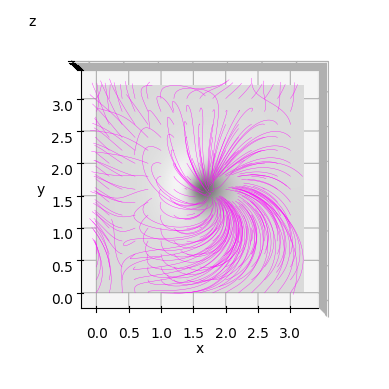

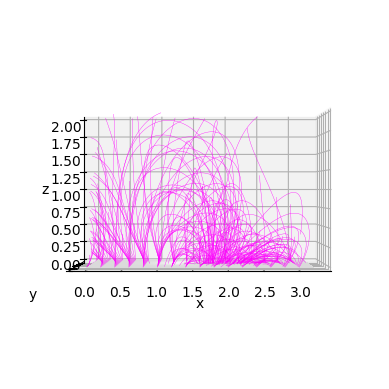

In [ ]:
B_ref_See = 0.0 * bfield
print(B_ref_See.shape)
print(B_ref.shape)

for iz in range(0, nresol_z):
    for ix in range(0, nresol_x):
        for iy in range(0, nresol_y):
            for id in range(0, 3):
                B_ref_See[nresol_y + iy, nresol_x + ix, iz, id] = B_ref[id, iy, ix, iz]
                B_ref_See[nresol_y + iy, ix, iz, id] = -B_ref[
                    id, iy, nresol_x - 1 - ix, iz
                ]
                B_ref_See[iy, nresol_x + ix, iz, id] = -B_ref[
                    id, nresol_y - 1 - iy, ix, iz
                ]
                B_ref_See[iy, ix, iz, id] = B_ref[
                    id, nresol_y - 1 - iy, nresol_x - 1 - ix, iz
                ]

print(bfield.shape)
plot = plot_fieldlines_issi_analytical(
    B_ref_See,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.2,
    view="top",
    cmap=cmap,
)

plotname = (
    "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_reference_"
    + "_"
    + str(a)
    + "_"
    + str(b)
    + "_"
    + str(alpha)
    + "_top.png"
)
plot.savefig(plotname, dpi=300)
plot.show()

plot = plot_fieldlines_issi_analytical(
    B_ref_See,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    stepsize=0.2,
    view="side",
    cmap=cmap,
)

plotname = (
    "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_reference_"
    + "_"
    + str(a)
    + "_"
    + str(b)
    + "_"
    + str(alpha)
    + "_side.png"
)
plot.savefig(plotname, dpi=300)
plot.show()

In [ ]:
print(
    "Field line",
    field_div_metric(
        B_ref_See,
        bfield,
        h1,
        hmin,
        hmax,
        eps,
        nresol_x,
        nresol_y,
        nresol_z,
        -xmax,
        xmax,
        -ymax,
        ymax,
        zmin,
        zmax,
        stepsize=0.1,
    ),
)
print(
    "Ref",
    field_div_metric(
        B_ref_See,
        B_ref_See,
        h1,
        hmin,
        hmax,
        eps,
        nresol_x,
        nresol_y,
        nresol_z,
        -xmax,
        xmax,
        -ymax,
        ymax,
        zmin,
        zmax,
        stepsize=0.1,
    ),
)

Field line 0.7102473498233216
Ref 1.0


Pressure minimum lin 0.4212639077053924
Pressure minimum lin 146449
Density minimum lin 6.289859422027889e-09
Density minimum lin 146399
Pressure minimum lin ref 0.43188784
Pressure minimum lin ref 316449
Density minimum lin ref 4.975967e-09
Density minimum lin ref 316528


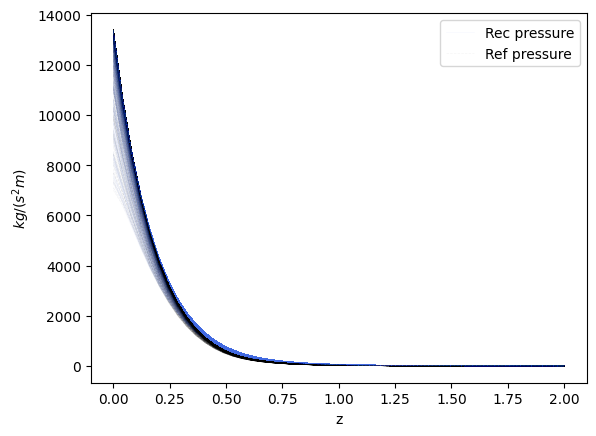

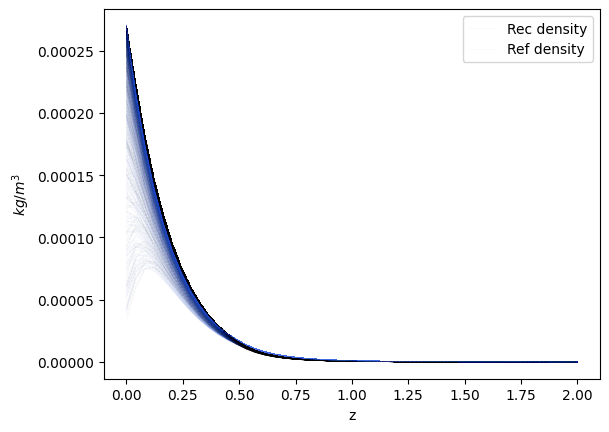

In [ ]:
print("Pressure minimum lin", fpres_lin.min())
print("Pressure minimum lin", fpres_lin.argmin())
print("Density minimum lin", fden_lin.min())
print("Density minimum lin", fden_lin.argmin())

print("Pressure minimum lin ref", pres_3d.min())
print("Pressure minimum lin ref", pres_3d.argmin())
print("Density minimum lin ref", den_3d.min())
print("Density minimum lin ref", den_3d.argmin())

plt.plot(
    z_arr,
    fpres_lin[0, 0, :],
    linewidth=0.5,
    color="royalblue",
    alpha=0.04,
    label="Rec pressure",
)
plt.plot(
    z_arr,
    pres_3d[:, 0, 0],
    linewidth=0.5,
    color="black",
    linestyle="dashed",
    alpha=0.04,
    label="Ref pressure",
)
for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(
            z_arr, fpres_lin[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04
        )
        plt.plot(
            z_arr,
            pres_3d[:, iy, ix],
            linewidth=0.5,
            color="black",
            linestyle="dashed",
            alpha=0.04,
        )
plt.ylabel("$kg/(s^2 m)$")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_xy.png"
plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr,
    fden_lin[0, 0, :],
    linewidth=0.5,
    color="royalblue",
    alpha=0.04,
    label="Rec density",
)
plt.plot(
    z_arr,
    den_3d[:, 0, 0],
    linewidth=0.5,
    color="black",
    linestyle="dashed",
    alpha=0.04,
    label="Ref density",
)
for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(
            z_arr, fden_lin[iy, ix, :], linewidth=0.5, color="royalblue", alpha=0.04
        )
        plt.plot(
            z_arr,
            den_3d[:, iy, ix],
            linewidth=0.5,
            color="black",
            linestyle="dashed",
            alpha=0.04,
        )
plt.ylabel("$kg/m^3$")
plt.xlabel("z")
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_xy.png"
plt.savefig(plotname, dpi=300)
plt.show()

In [ ]:
p_err_abs = np.zeros((nresol_x, nresol_y))
p_err_rel = np.zeros_like(p_err_abs)

for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        p_err_abs[ix, iy] = min(abs(fpres_lin[iy, ix, :] - pres_3d[:, iy, ix]))
        p_err_rel[ix, iy] = min(
            abs(fpres_lin[iy, ix, :] - pres_3d[:, iy, ix]) / abs(pres_3d[:, iy, ix])
        )


print(p_err_abs.max())
print(p_err_rel.max())

0.5712258827688026
0.01627459260750344


In [ ]:
d_err_abs = np.zeros((nresol_x, nresol_y))
d_err_rel = np.zeros_like(p_err_abs)

for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        d_err_abs[ix, iy] = min(abs(fden_lin[iy, ix, :] - den_3d[:, iy, ix]))
        d_err_rel[ix, iy] = min(
            abs(fden_lin[iy, ix, :] - den_3d[:, iy, ix]) / abs(den_3d[:, iy, ix])
        )


print(d_err_abs.max())
print(d_err_rel.max())

6.929118791569946e-09
0.018862746679264897


Pearson Correlation reference value for pressure PearsonRResult(statistic=1.0, pvalue=0.0)
Pearson Correlation reference value for density PearsonRResult(statistic=0.9999999999999969, pvalue=0.0)
Pearson Correlation actual value for pressure PearsonRResult(statistic=0.9980203690465129, pvalue=0.0)
Pearson Correlation actual value for density PearsonRResult(statistic=0.9974192583405771, pvalue=0.0)


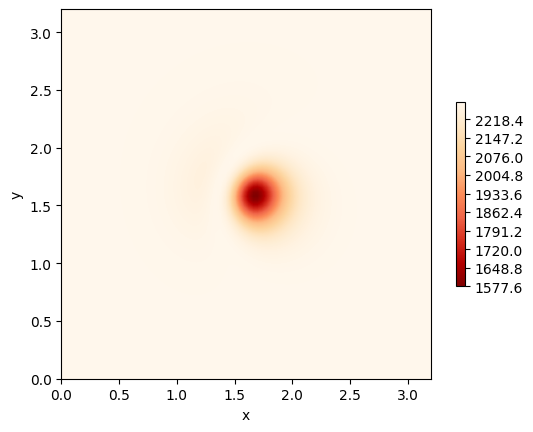

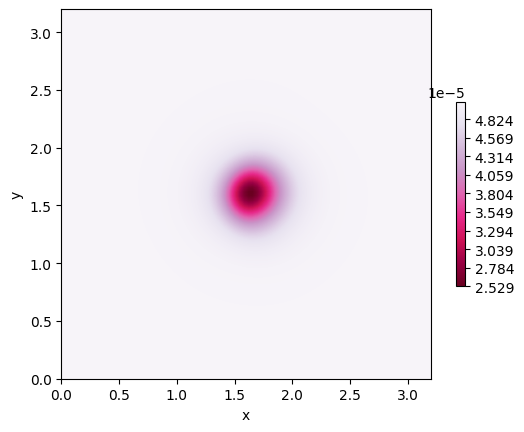

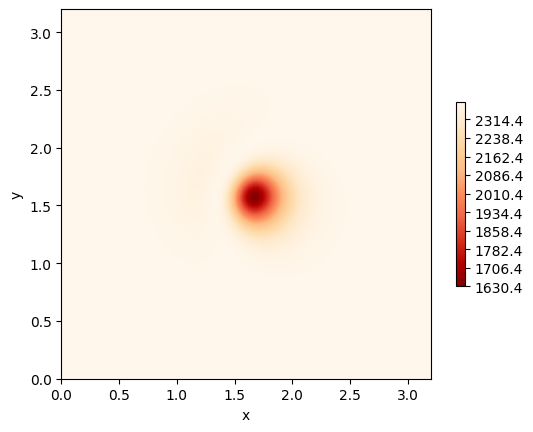

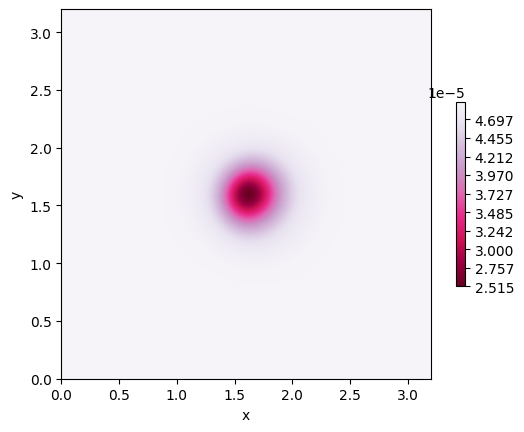

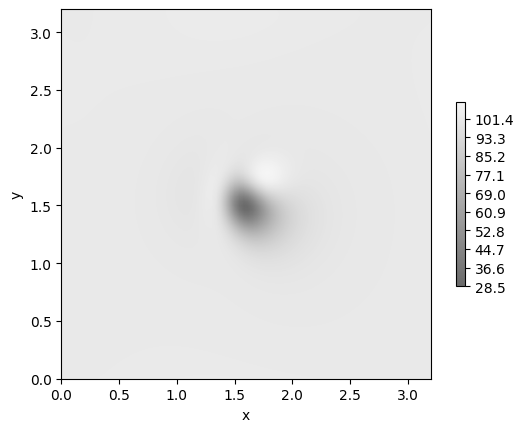

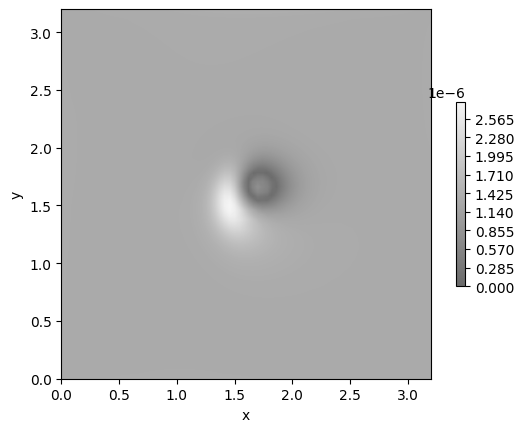

Max diff p 108.89909944901456
Max diff d 2.824661071569507e-06


In [ ]:
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

pres_surface_ref, den_surface_ref, pres_surface_rec, den_surface_rec = (
    pearson_corr_coeff(
        pres_3d,
        den_3d,
        fpres_lin,
        fden_lin,
        nresol_x,
        nresol_y,
        nresol_z,
        zmin,
        zmax,
    )
)

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(y_plot, x_plot, pres_surface_ref, 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
fig.colorbar(cs, shrink=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_ref_los.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(y_plot, x_plot, den_surface_ref, 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
fig.colorbar(cs, shrink=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_ref_los.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(y_plot, x_plot, pres_surface_rec, 1000, cmap="OrRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
fig.colorbar(cs, shrink=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_rec_los.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(y_plot, x_plot, den_surface_rec, 1000, cmap="PuRd_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
fig.colorbar(cs, shrink=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_rec_los.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(y_plot, x_plot, abs(pres_surface_rec - pres_surface_ref), 1000, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
fig.colorbar(cs, shrink=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fp_los_error.png"
plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(y_plot, x_plot, abs(den_surface_rec - den_surface_ref), 1000, cmap=cmap)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_box_aspect(1)
fig.colorbar(cs, shrink=0.5)
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_fd_los_error.png"
plt.savefig(plotname, dpi=300)
plt.show()

error_d = abs(den_surface_rec - den_surface_ref)
error_p = abs(pres_surface_rec - pres_surface_ref)

print("Max diff p", error_p.max())
print("Max diff d", error_d.max())

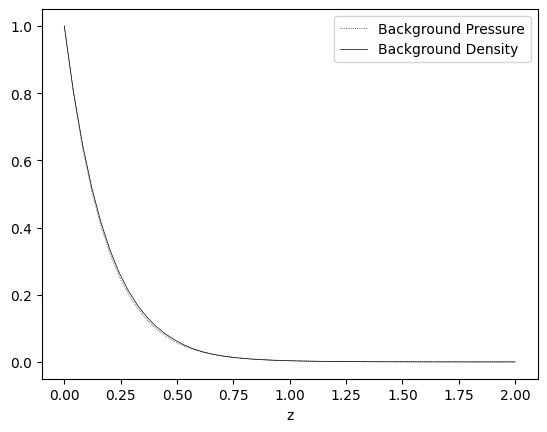

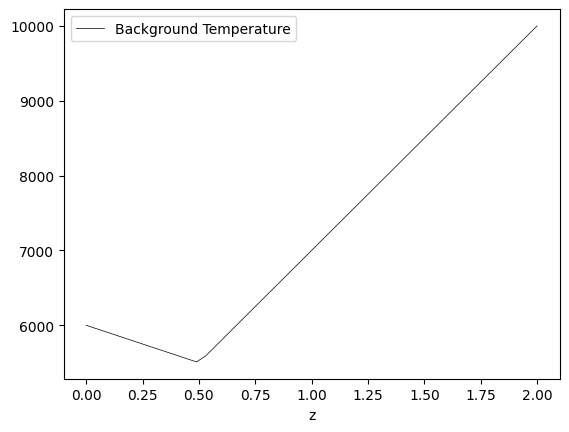

In [ ]:
plt.close()

fig = plt.figure()
plt.plot(
    z_arr,
    Backpres,
    linewidth=0.5,
    color="black", 
    linestyle="dotted",
    label="Background Pressure"
)
plt.plot(
    z_arr,
    Backden,
    linewidth=0.5,
    color="black", 
    linestyle="solid",
    label="Background Density"
)
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_batm2.png"
plt.xlabel("z")
plt.savefig(plotname, dpi=300)
plt.show()


fig = plt.figure()
plt.plot(
    z_arr,
    backtemp,
    linewidth=0.5,
    color="black", 
    linestyle="solid",
    label="Background Temperature"
)
plt.legend()
plotname = "/Users/lilli/Desktop/Thesis_vonNeu/ISSI_analytical_btemp2.png"
plt.xlabel("z")
plt.savefig(plotname, dpi=300)
plt.show()